In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
!wget https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg

--2021-08-25 10:25:43--  https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg
Resolving www.sciencenews.org (www.sciencenews.org)... 23.185.0.2, 2620:12a:8000::2
Connecting to www.sciencenews.org (www.sciencenews.org)|23.185.0.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61745 (60K) [image/jpeg]
Saving to: ‘033120_HT_covid-cat_feat-1028x579.jpg’

033120_HT_covid-cat 100%[===================>]  60.30K  --.-KB/s    in 0.004s  

2021-08-25 10:25:44 (15.6 MB/s) - ‘033120_HT_covid-cat_feat-1028x579.jpg’ saved [61745/61745]



In [3]:
!ls -lia

total 76
   262146 drwxr-xr-x 2 root root  4096 Aug 25 10:25 .
136992908 drwxr-xr-x 5 root root  4096 Aug 25 10:24 ..
   262152 -rw-r--r-- 1 root root 61745 Mar 31  2020 033120_HT_covid-cat_feat-1028x579.jpg
   262149 ---------- 1 root root   263 Aug 25 10:24 __notebook_source__.ipynb


In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

org_image = cv2.cvtColor(
    cv2.imread('033120_HT_covid-cat_feat-1028x579.jpg'),
    cv2.COLOR_BGR2RGB
)

In [5]:
def show_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')

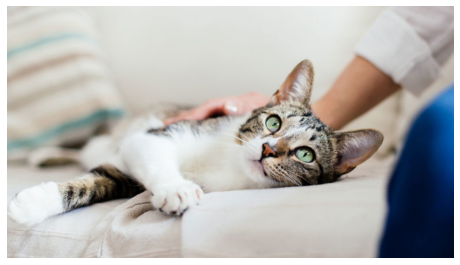

In [6]:
show_image(org_image)

In [7]:
print(org_image.shape)

(579, 1028, 3)


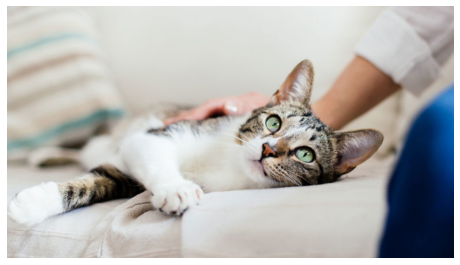

In [8]:
import albumentations as a

augmentor = a.HorizontalFlip(p=0.5)
aug_img = augmentor(image=org_image)['image']
show_image(aug_img)

In [9]:
def show_images(images, labels, ncols=4, title=None):
    
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    
    for i in range(ncols):
        axs[i].imshow(images[i])
        axs[i].set_title(labels[i])

In [10]:
def repeat_aug(count=4, org_image=None, label=None, augmentor=None):
    image_list = [org_image]
    label_list = ['original']
    
    for i in range(count):
        aug_image = augmentor(image=org_image)['image']
        image_list.append(aug_image)
        label_list.append(label)
    
    show_images(image_list, label_list, ncols=count+1)

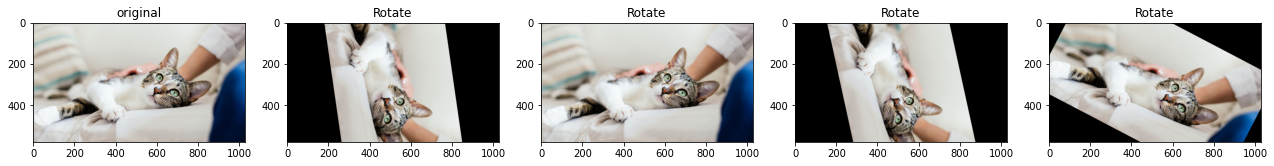

In [11]:
augmentor = a.Rotate(limit=90, border_mode=cv2.BORDER_CONSTANT)

repeat_aug(count=4, org_image=org_image, label='Rotate', augmentor=augmentor)

### Horizontalflip and Verticalflip

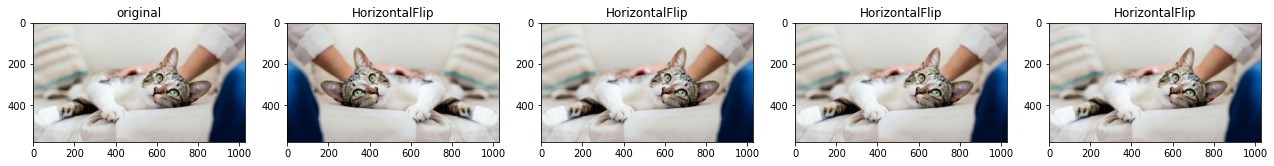

In [12]:
augmentor = a.HorizontalFlip(p=0.5)

repeat_aug(count=4, org_image=org_image, label='HorizontalFlip', augmentor=augmentor)

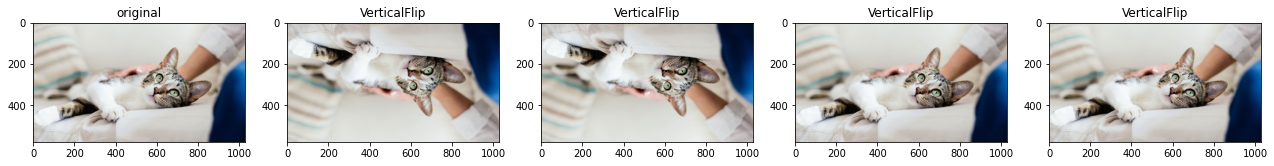

In [13]:
augmentor = a.VerticalFlip(p=0.5)

repeat_aug(count=4, org_image=org_image, label='VerticalFlip', augmentor=augmentor)

### Roatation

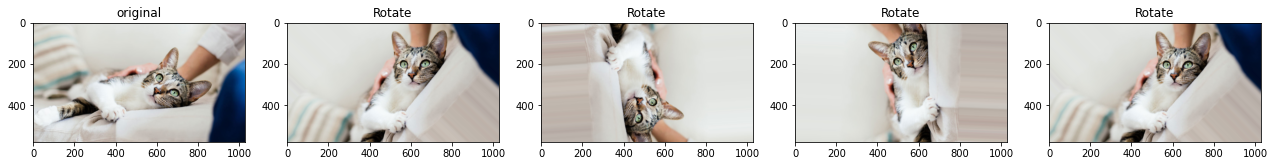

In [15]:
augmentor = a.Rotate(limit=90, p=1, border_mode=cv2.BORDER_REPLICATE)

repeat_aug(count=4, org_image=org_image, label='Rotate', augmentor=augmentor)

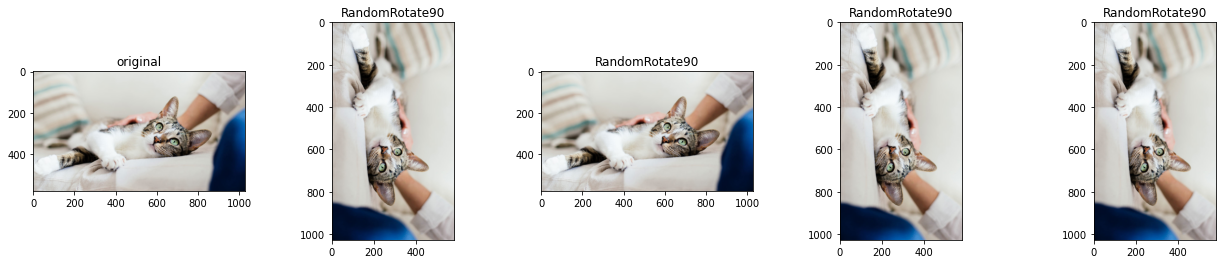

In [16]:
augmentor = a.RandomRotate90(p=1)

repeat_aug(count=4, org_image=org_image, label='RandomRotate90', augmentor=augmentor)

### ShiftScaleRotation

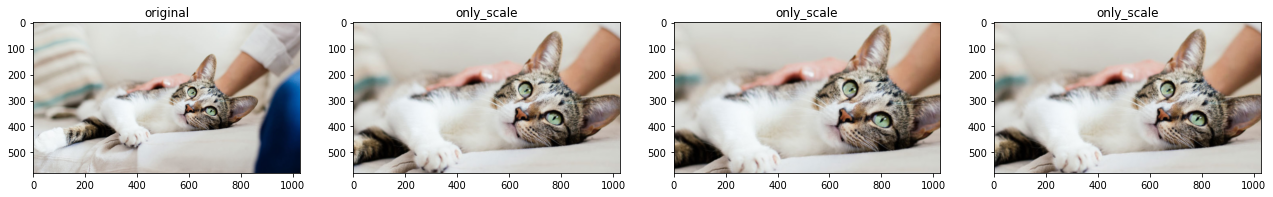

In [17]:
augmentor = a.ShiftScaleRotate (shift_limit=0, scale_limit=(0.5, 1.0), rotate_limit=0, p=1)
repeat_aug(count=3, org_image=org_image, label='only_scale', augmentor=augmentor)

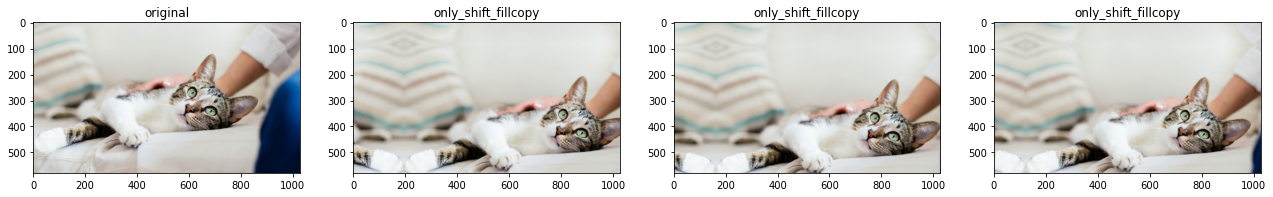

In [18]:
augmentor = a.ShiftScaleRotate (shift_limit=(0.2, 0.1), scale_limit=0, 
                                rotate_limit=0, p=1)
repeat_aug(count=3, org_image=org_image, label='only_shift_fillcopy', augmentor=augmentor)

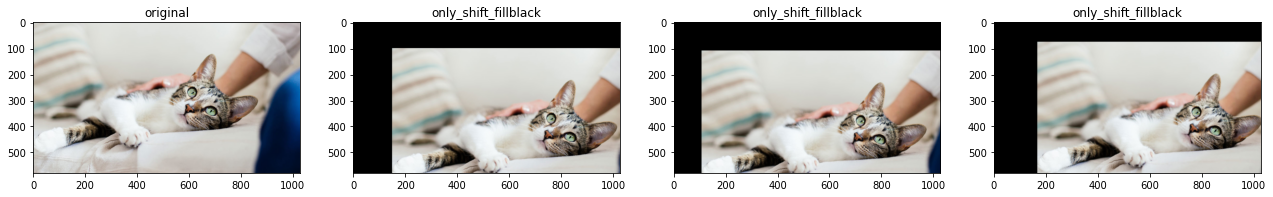

In [20]:
augmentor = a.ShiftScaleRotate (shift_limit=(0.2, 0.1), scale_limit=0, 
                                rotate_limit=0, border_mode=cv2.BORDER_CONSTANT, p=1)
repeat_aug(count=3, org_image=org_image, label='only_shift_fillblack', augmentor=augmentor)

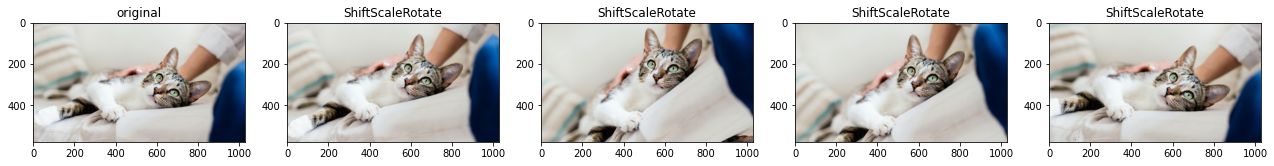

In [22]:
augmentor = a.ShiftScaleRotate (p=1)
repeat_aug(count=4, org_image=org_image, label='ShiftScaleRotate', augmentor=augmentor)

### Compose

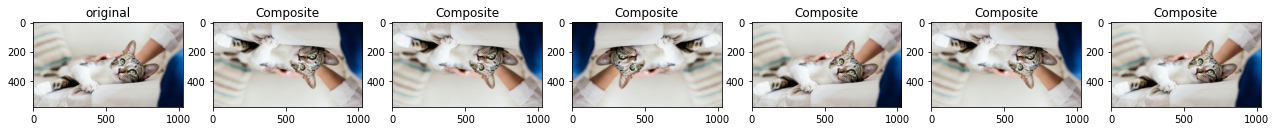

In [23]:
augmentor = a.Compose([
    a.VerticalFlip(p=0.5),
    a.HorizontalFlip(p=0.5)
])

repeat_aug(count=6, org_image=org_image, label='Composite', augmentor=augmentor)

### Crop

crop image size:  (400, 400, 3)


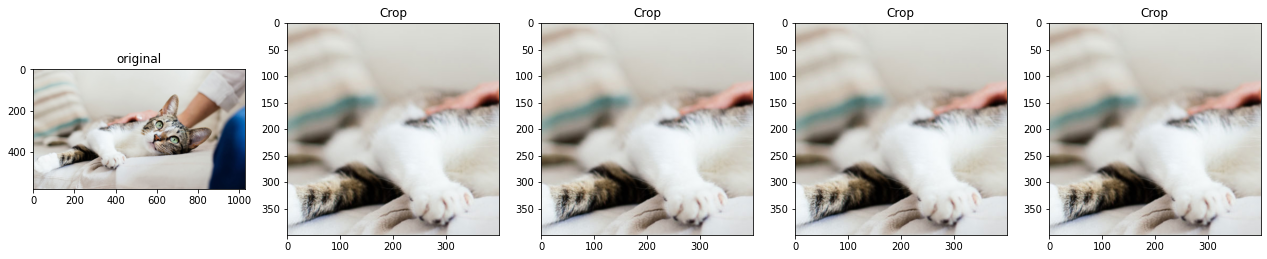

In [26]:
augmentor = a.Crop(
    x_min=100,
    y_min=100,
    x_max=500,
    y_max=500,
    p=1
)

aug_image = augmentor(image=org_image)['image']

print('crop image size: ', aug_image.shape)

repeat_aug(count=4, org_image=org_image, label='Crop', augmentor=augmentor)

crop and resize image size:  (578, 1028, 3)


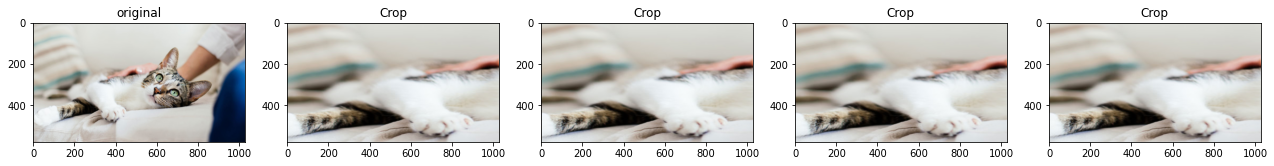

In [28]:
augmentor = a.Compose([
    a.Crop(
        x_min=100,
        y_min=100,
        x_max=500,
        y_max=500,
        p=1
    ),
    a.Resize(578, 1028)
])

aug_image = augmentor(image=org_image)['image']

print('crop and resize image size: ', aug_image.shape)

repeat_aug(count=4, org_image=org_image, label='Crop', augmentor=augmentor)

### CenterCrop

centercrop image size:  (300, 500, 3)


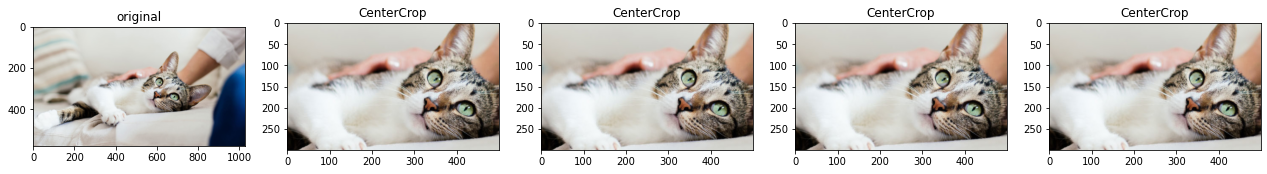

In [31]:
augmentor = a.CenterCrop(height=300, width=500, p=1)

aug_image = augmentor(image=org_image)['image']

print('centercrop image size: ', aug_image.shape)

repeat_aug(count=4, org_image=org_image, label='CenterCrop', augmentor=augmentor)

centorcrop and resize image shape:  (578, 1028, 3)


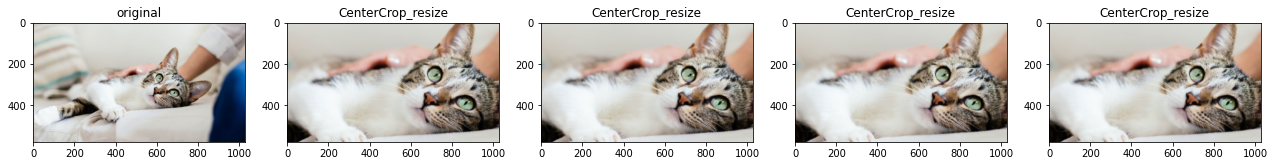

In [33]:
augmentor = a.Compose([
    a.CenterCrop(height=300, width=500, p=1),
    a.Resize(578, 1028)
])

aug_image = augmentor(image=org_image)['image']

print('centorcrop and resize image shape: ', aug_image.shape)

repeat_aug(count=4, org_image=org_image, label='CenterCrop_resize', augmentor=augmentor)

### RandomCrop

randomcrop image size:  (300, 500, 3)


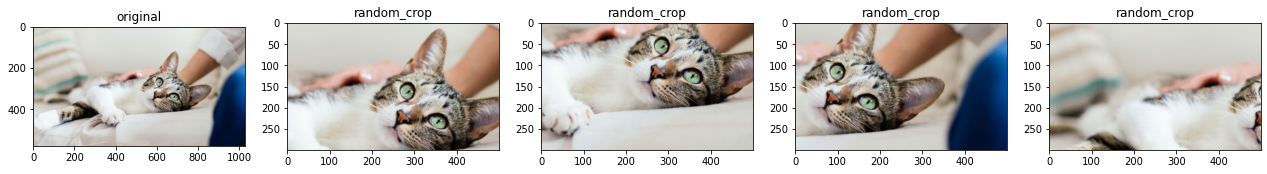

In [34]:
augmentor = a.RandomCrop(height=300, width=500, p=1)

aug_image = augmentor(image=org_image)['image']

print('randomcrop image size: ', aug_image.shape)

repeat_aug(count=4, org_image=org_image, label='random_crop', augmentor=augmentor)

randomcrop and resize image size:  (578, 1028, 3)


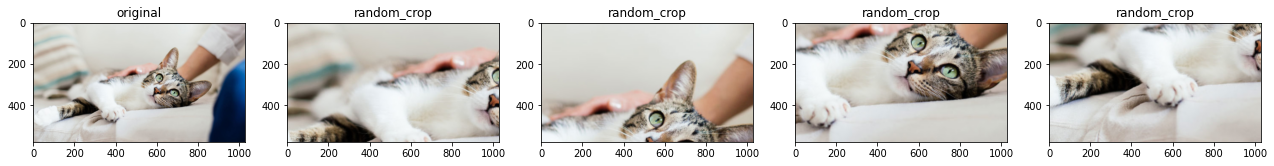

In [36]:
augmentor = a.Compose([
    a.RandomCrop(height=300, width=500, p=1),
    a.Resize(578, 1028)
])

aug_image = augmentor(image=org_image)['image']

print('randomcrop and resize image size: ', aug_image.shape)

repeat_aug(count=4, org_image=org_image, label='random_crop', augmentor=augmentor)

### RandomResizedCrop

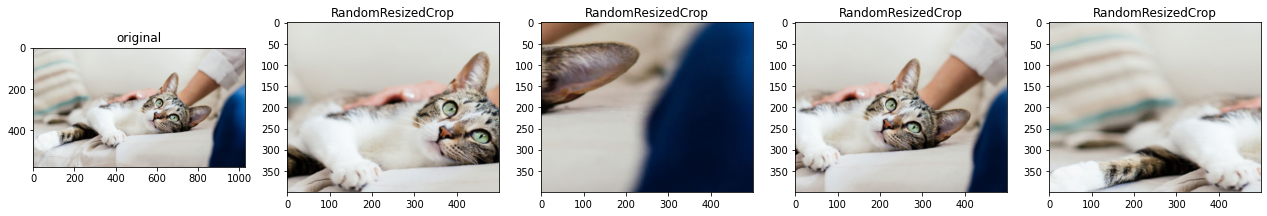

In [37]:
augmentor = a.RandomResizedCrop(height=400, width=500)

aug_image = augmentor(image=org_image)['image']

repeat_aug(count=4, org_image=org_image, label='RandomResizedCrop', augmentor=augmentor)

randomresizedcrop image shape:  (578, 1028, 3)


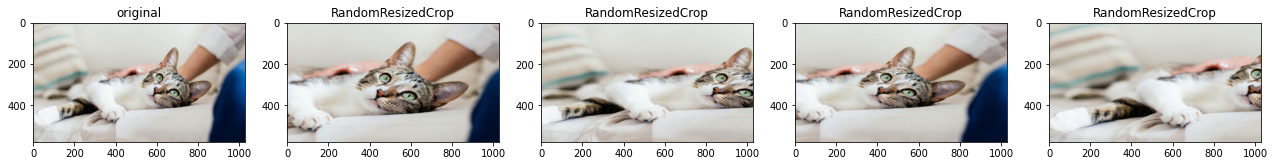

In [39]:
augmentor = a.RandomResizedCrop(height=578, width=1028, scale=(0.5, 0.9), p=1)

aug_image = augmentor(image=org_image)['image']

print('randomresizedcrop image shape: ', aug_image.shape)

repeat_aug(count=4, org_image=org_image, label='RandomResizedCrop', augmentor=augmentor)

### RandomBrightnessContrast

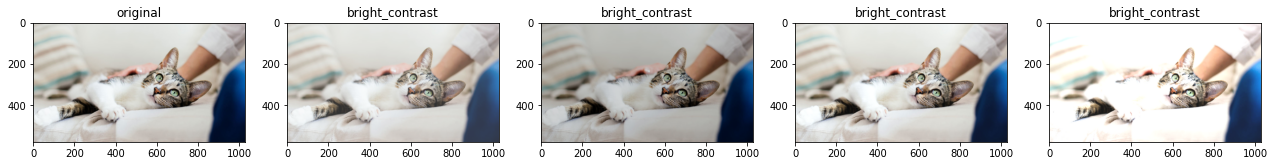

In [41]:
augmentor = a.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=1)
repeat_aug(count=4, org_image=org_image, label='bright_contrast', augmentor=augmentor)

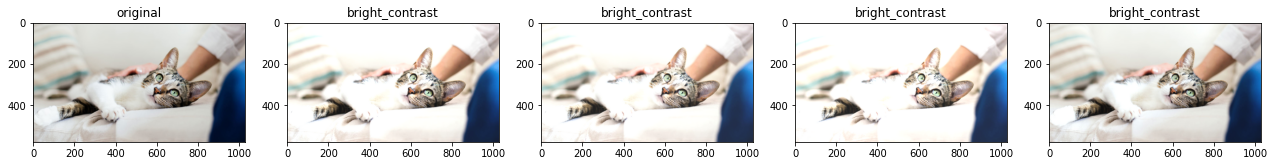

In [42]:
augmentor = a.RandomBrightnessContrast(brightness_limit=(0, 0.2), contrast_limit=(0, 0.2), p=1)
repeat_aug(count=4, org_image=org_image, label='bright_contrast', augmentor=augmentor)

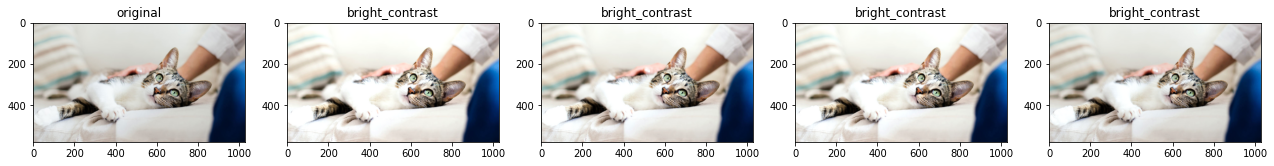

In [44]:
augmentor = a.RandomBrightnessContrast(brightness_limit=0, contrast_limit=(0, 0.2), p=1)
repeat_aug(count=4, org_image=org_image, label='bright_contrast', augmentor=augmentor)

### HueSaturationValue

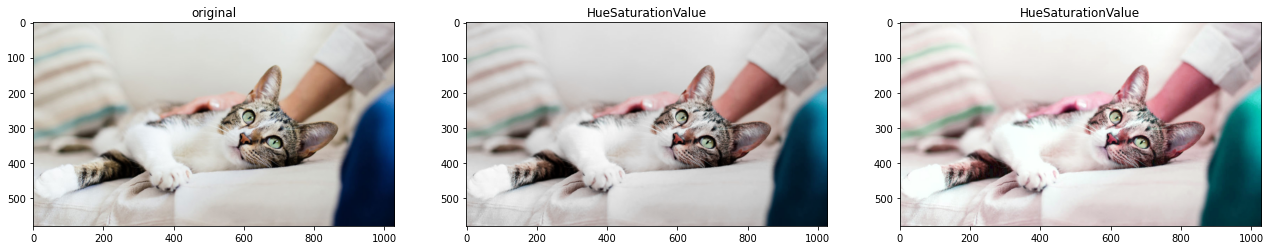

In [47]:
augmentor = a.HueSaturationValue(p=1)
repeat_aug(count=2, org_image=org_image, label='HueSaturationValue', augmentor=augmentor)

### RGBShift

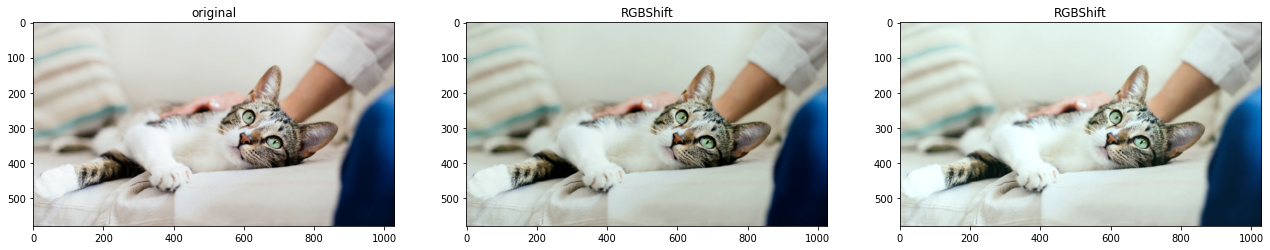

In [48]:
augmentor = a.RGBShift(p=1)
repeat_aug(count=2, org_image=org_image, label='RGBShift', augmentor=augmentor)

### ChannelShuffle

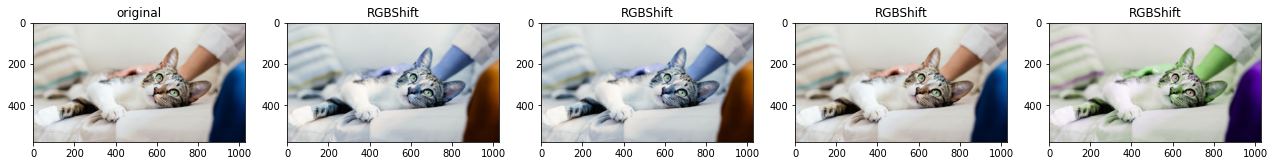

In [49]:
augmentor = a.ChannelShuffle(p=1)
repeat_aug(count=4, org_image=org_image, label='RGBShift', augmentor=augmentor)

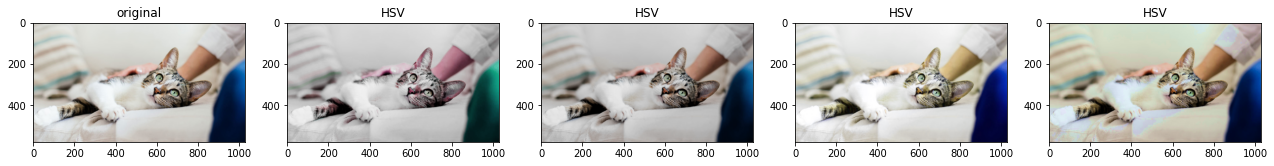

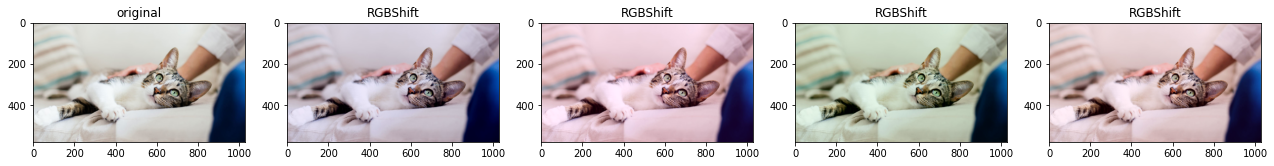

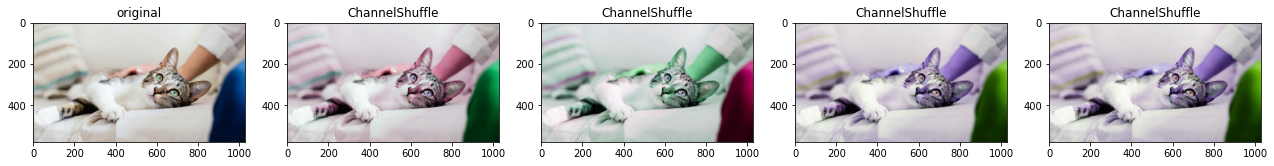

In [50]:
augmentor_hsv = a.HueSaturationValue(p=1)
augmentor_rgb = a.RGBShift(p=1)
augmentor_channel = a.ChannelShuffle(p=1)
repeat_aug(count=4, org_image=org_image, label='HSV', augmentor=augmentor_hsv)
repeat_aug(count=4, org_image=org_image, label='RGBShift', augmentor=augmentor_rgb)
repeat_aug(count=4, org_image=org_image, label='ChannelShuffle', augmentor=augmentor_channel)

### ColorJitter

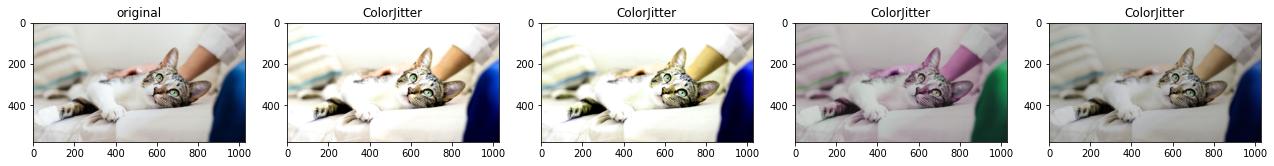

In [51]:
augmentor_hsv = a.ColorJitter(p=1)
repeat_aug(count=4, org_image=org_image, label='ColorJitter', augmentor=augmentor_hsv)

### Gaussian Noise

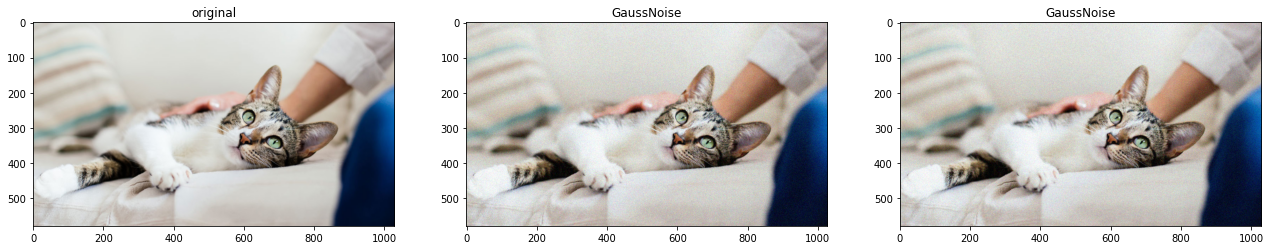

In [53]:
augmentor = a.GaussNoise(p=1, var_limit=(100, 200))
repeat_aug(count=2, org_image=org_image, label='GaussNoise', augmentor=augmentor)

### Cutout

/opt/conda/lib/python3.7/site-packages/albumentations/augmentations/transforms.py:690: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


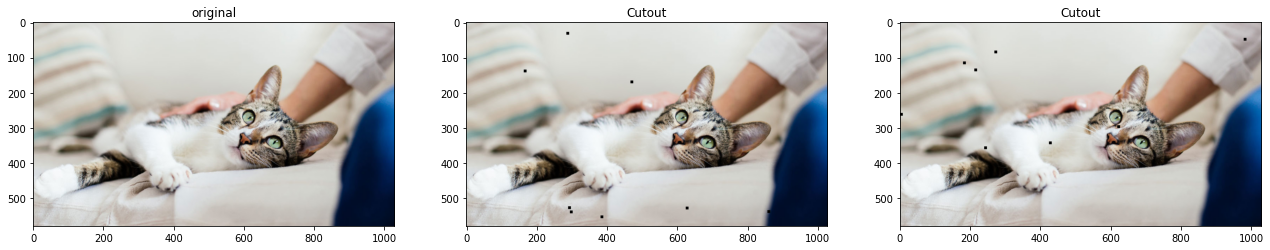

In [55]:
augmentor = a.Cutout(p=1)
repeat_aug(count=2, org_image=org_image, label='Cutout', augmentor=augmentor)

### CoarseDropout

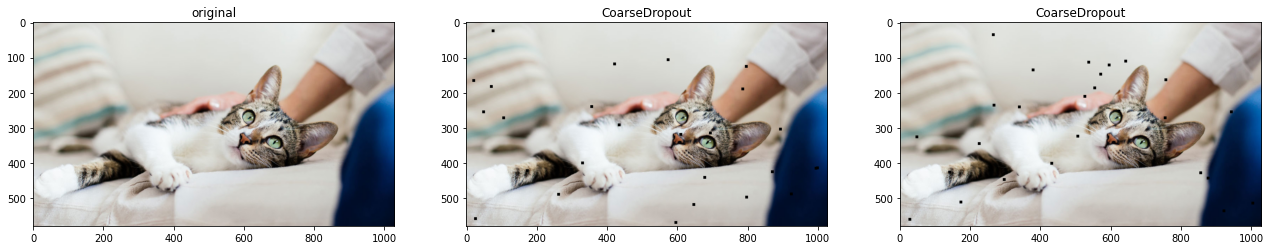

In [57]:
augmentor = a.CoarseDropout(p=1, max_holes=26)
repeat_aug(count=2, org_image=org_image, label='CoarseDropout', augmentor=augmentor)

### CLAHE(Contrast-limited adaptive histogram equalization)

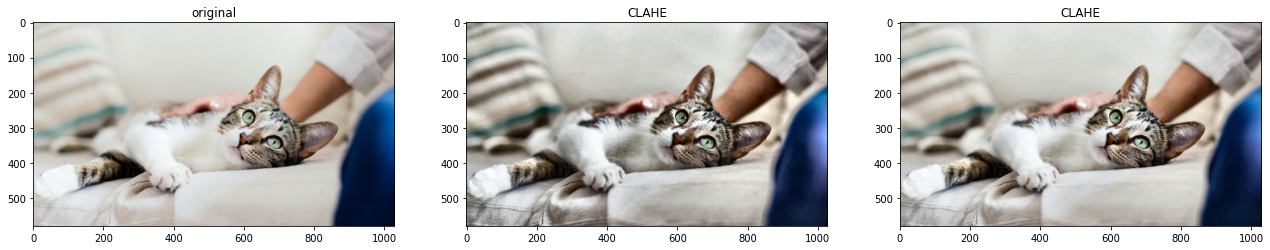

In [58]:
augmentor_hsv = a.CLAHE(p=1, clip_limit=4)
repeat_aug(count=2, org_image=org_image, label='CLAHE', augmentor=augmentor_hsv)

### Blur

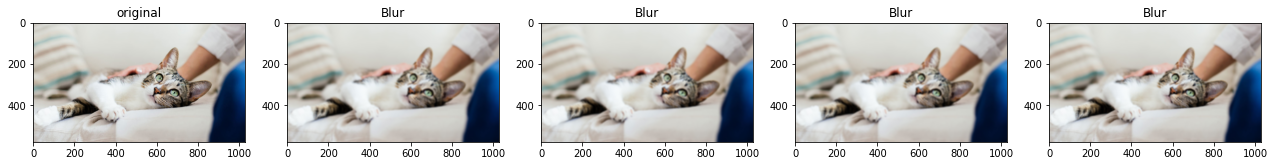

In [60]:
augmentor = a.Blur(p=1, blur_limit=(7, 10))
repeat_aug(count=4, org_image=org_image, label='Blur', augmentor=augmentor)

### GaussianBlur

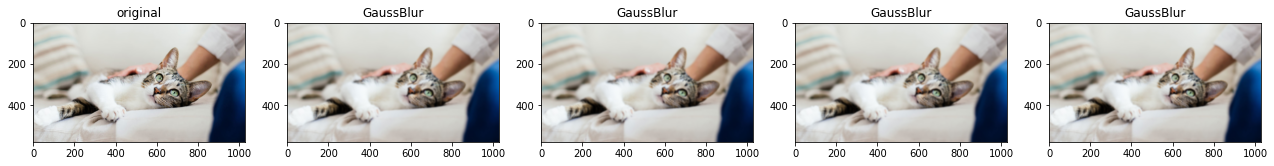

In [62]:
augmentor = a.GaussianBlur(p=1, blur_limit=(11, 15))
repeat_aug(count=4, org_image=org_image, label='GaussBlur', augmentor=augmentor)

### Weather Noise

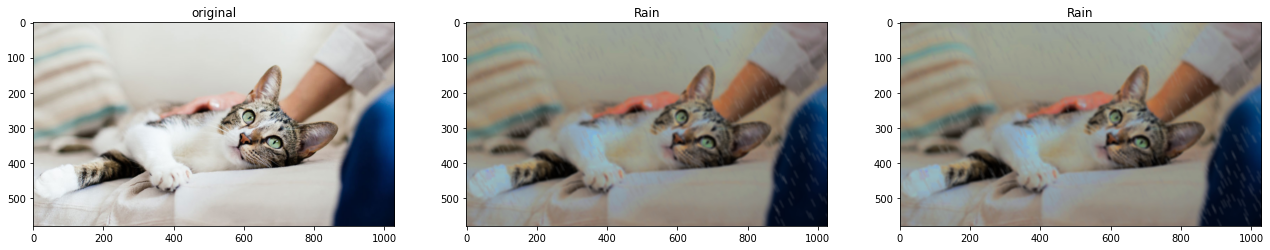

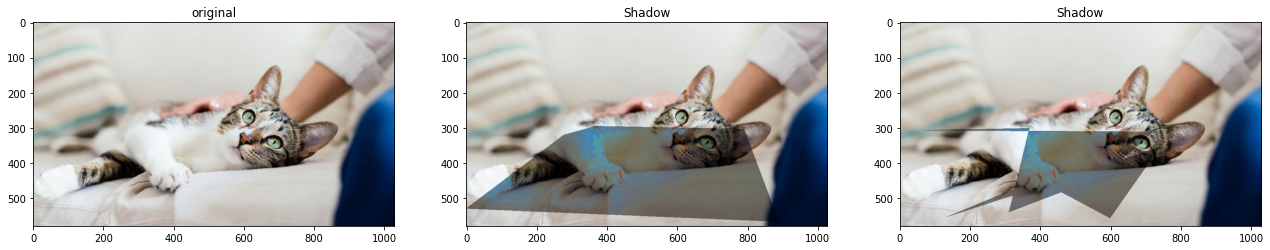

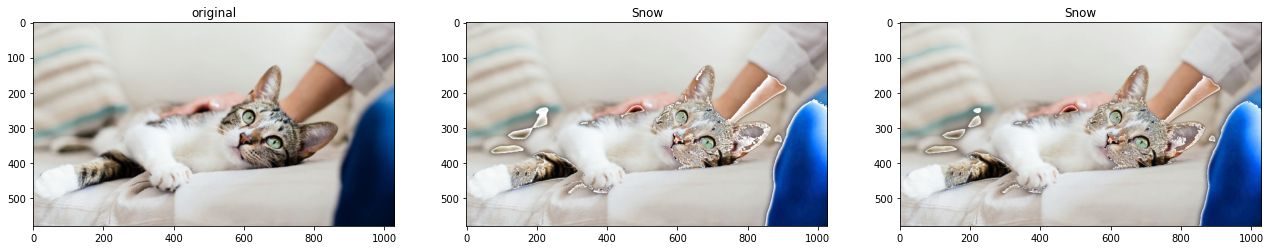

In [64]:
augmentor = a.RandomRain(p=1)
repeat_aug(count=2, org_image=org_image, label='Rain', augmentor=augmentor)

augmentor = a.RandomShadow(p=1)
repeat_aug(count=2, org_image=org_image, label='Shadow', augmentor=augmentor)

augmentor = a.RandomSnow(p=1)
repeat_aug(count=2, org_image=org_image, label='Snow', augmentor=augmentor)

### Compose Augmentation Chain

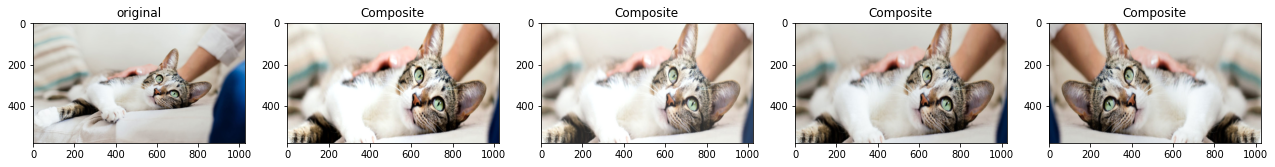

In [65]:
augmentor = a.Compose([
    a.CenterCrop(height=300, width=800),
    a.HorizontalFlip(p=0.5),
    a.RandomBrightnessContrast(p=0.5),
    a.Resize(579, 1024, p=1)
])
repeat_aug(count=4, org_image=org_image, label='Composite', augmentor=augmentor)

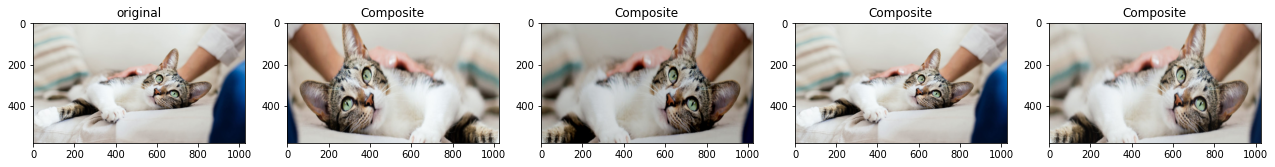

In [66]:
augmentor = a.Compose([
    a.CenterCrop(height=300, width=800),
    a.HorizontalFlip(p=0.5),
    a.RandomBrightnessContrast(p=0.5),
    a.Resize(579, 1024, p=1)
], p=0.5)
repeat_aug(count=4, org_image=org_image, label='Composite', augmentor=augmentor)

### One of

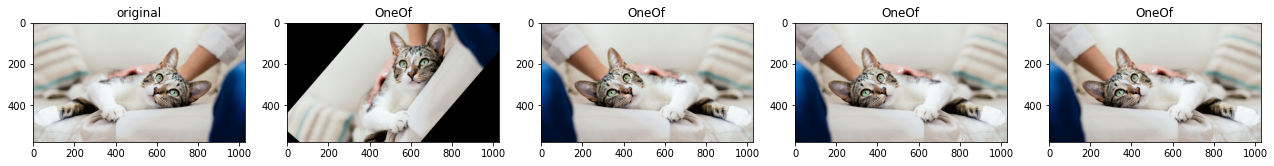

In [67]:
augmentor = a.OneOf([
    a.VerticalFlip(p=1),
    a.HorizontalFlip(p=1),
    a.Rotate(limit=(45, 90), p=1, border_mode=cv2.BORDER_CONSTANT)
    ], p=1)
repeat_aug(count=4, org_image=org_image, label='OneOf', augmentor=augmentor)

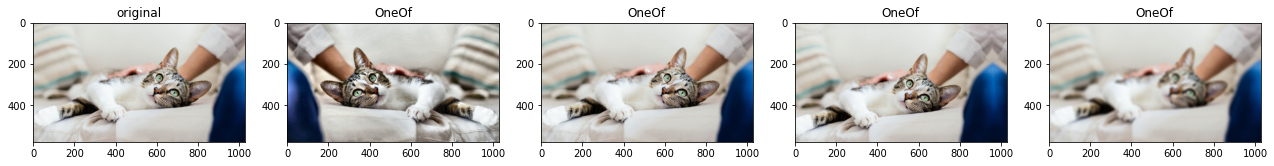

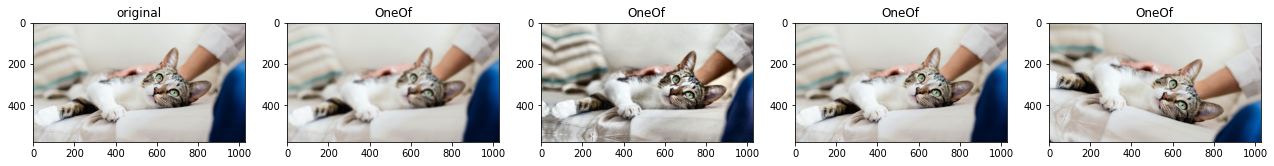

In [68]:
augmentor = a.Compose([
    a.HorizontalFlip(p=0.5),
    a.ShiftScaleRotate(p=0.5),
    a.OneOf([
        a.CLAHE(p=0.3),
        a.Blur(blur_limit=(10, 15), p=0.3)
    ], p=0.5)
])
repeat_aug(count=4, org_image=org_image, label='OneOf', augmentor=augmentor)
repeat_aug(count=4, org_image=org_image, label='OneOf', augmentor=augmentor)